# Text Analysis for Finding Keywords

## Table of Contents
1. Load Packages and Data
    * Required packages
    * Prompt for pdf
2. Read Text
3. Extract Keywords
    * Key words
    * Key phrases
4. Summary
    * Watermark

## Load Packages and Data

In [12]:
# handling for and manipulation of arrays and dataframes
import numpy as np
import pandas as pd

# get pdf as string
from io import StringIO
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfdocument import PDFDocument
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.pdfpage import PDFPage
from pdfminer.pdfparser import PDFParser

# text processing
import PyPDF2
import textract
from sklearn.feature_extraction.text import CountVectorizer
import re
from rake_nltk import Rake
#from gensim.summarization import keywords

# accessing directory and os settings
import os
import sys 

### Enter the link to the pdf: 

In [128]:
# enter path for pdf of interest
# C:\Users\Hailey\Desktop\sample.pdf
pdf_link = input()

C:\Users\Hailey\Desktop\sample.pdf


### Read Text 
Take the user provided link, get pdf, and get a text variable that contains all the text from the pdf file. 

In [142]:
def convert_pdf_to_string(file_path):

    output_string = StringIO()
    with open(file_path, 'rb') as in_file:
        parser = PDFParser(in_file)
        doc = PDFDocument(parser)
        rsrcmgr = PDFResourceManager()
        device = TextConverter(rsrcmgr, output_string, laparams=LAParams())
        interpreter = PDFPageInterpreter(rsrcmgr, device)
        for page in PDFPage.create_pages(doc):
            interpreter.process_page(page)
    if output_string.getvalue() != "":
        output_string = output_string
    else:
        output_string = textract.process('http://bit.ly/epo_keyword_extraction_document', method='tesseract', language='eng')

    return(output_string.getvalue())

In [143]:
text = convert_pdf_to_string(pdf_link)

In [13]:
text = '''
More than half a million farmers and ranchers are implementing conservation practices on their farms across the U.S. One West Texas farmer is taking his conservation efforts one step further with a regenerative approach to agricultural production.

“It’s about putting the land first and that’s really what regenerative agriculture is all about,” R.N. Hopper, a farmer from Petersburg, Texas, said. “It is putting the health of the land first, and when you put the health of the land first, everything else falls into place, the land is healthy, it’s vibrant, it’s productive.”

Hopper and his family farm the same land his grandfather began farming in the late 1930s. While they have always considered themselves to be stewards of the land, it wasn’t until the last decade that they began to view their farm as a living, breathing ecosystem.

In an ecosystem, a community of living and non-living components are all connected through energy and nutrient cycles within their environment. When it comes to farming, plants, soil, water, oxygen and animals are all interconnected in an ecosystem teeming with life.

Hopper said regenerative agriculture requires the action of returning the natural resources in farmers’ care to a healthier state than when they first began using them. When a farming ecosystem is healthy, it is able to flourish.

“There is no best way, only better ways, and we continually, over time, try to adapt to what we are doing,” Hopper said, “maximize conservation and to make more output with less input.”

In the journey to achieving enhanced regenerative agriculture, Hopper continually makes improvements in his production practices each year that promote conservation and a healthy ecosystem.

By growing corn, cotton and wheat in a crop rotation, Hopper is able to feed the soil microbes and help break down soil-borne pathogens due to the diversity in plant varieties and root structures. Crop rotation also helps control weeds that compete with crops for water and key nutrients in the soil.

The use of continuous no-till farming, the practice of not disturbing the soil through tillage, helps Hopper build organic matter and nutrients in the soil, increasing the overall health of the soil. No-till farming also increases the water-holding capacity of the soil, making more water available to crops.

“We do everything we can to minimize our impacts on soil biology,” Hopper said. “We want to leave a small footprint on the ground as to not disturb things.”

Upon working with the USDA Natural Resources Conservation Service (NRCS) and the soil and water conservation districts on a fall cover crop research project beginning in 2014, Hopper now fully utilizes cover crops on his farm today. In conjunction with no-till farming, cover crops control soil erosion from wind and water. Cover crops also help build soil organic matter and contribute to overall soil health.

“Over the years, we had failures and successes with the fall planted cover crops,” Hopper said, “In the end we decided that late-summer planted covers were a better fit. But the field in that project went from being one of our lowest-producing fields to one of our highest-producing fields today.”

Water is necessary for the growth of a healthy crop. While farmers rely on rainwater, inadequate rainfall, especially in times of drought, requires them to use groundwater pumped from aquifers to irrigate their crops through important stages of growth.

To ensure efficient water use, Hopper utilizes irrigation water management on his farm. Technology allows Hopper to track the timing and quantity of irrigation, as well as how much rainfall is received in his fields. With soil moisture probes, Hopper is also able to measure the moisture in the soil available for crops to grow. These technologies enable Hopper to irrigate his crops only when and where it is needed, avoiding any unnecessary use of precious water.

The symbiotic relationship of these conservation efforts doesn’t just benefit the environment.

“We can grow bountiful crops on fewer resources and inputs,” Hopper said, “which translates to less expensive goods and products for consumers.”

Agricultural conservation improves the quality and quantity of natural resources for a healthier environment while providing more affordable food, clothing and thousands of other products that are used by consumers on a daily basis.

The conservation actions taken by Hopper and his fellow farmers are establishing a new standard for a brighter future. Hopper said he hopes to create a regenerative future whereby the land is left in a better place than when it was found, while teaching the next generation to do the same.

“I don’t know that I can really articulate it or put it into words,” Hopper said, “but I consider a good farmer as someone who is a wise and dutiful steward of the land and takes care of the resources that are entrusted to him by the Creator. I try to be the best steward that I can be.”
'''

## Extract Keywords 

### Key Words
Function to clean text, then extract and score keywords

In [14]:
def text_preprocess(text):
    # clean text
    text = re.sub("\\d|\\W", " ", text)
    text = text.strip('\n')
    # make all same case
    text = text.lower()
        
    return text 

In [15]:
text = text_preprocess(text)

In [30]:
blob_text = tb(text)
type(blob_text)

textblob.blob.TextBlob

In [31]:
import math
from textblob import TextBlob as tb

def tf(word, blob):
    return blob.words.count(word) / len(blob.words)

def n_containing(word, bloblist):
    return sum(1 for blob in bloblist if word in blob.words)

def idf(word, bloblist):
    return math.log(len(bloblist) / (1 + n_containing(word, bloblist)))

def tfidf(word, blob, bloblist):
    return tf(word, blob) * idf(word, bloblist)

In [32]:
bloblist = [blob_text]
#for i, blob in enumerate(bloblist):
    #print("Top words in document {}".format(i + 1))

scores = {word: tfidf(word, blob, bloblist) for word in blob.words}
sorted_words = sorted(scores.items(), key=lambda x: x[1], reverse=True)
for word, score in sorted_words[:15]:
    print("\tWord: {}, TF-IDF: {}".format(word, round(score, 5)))

NameError: name 'blob' is not defined

In [29]:
blob.words.count(word)

NameError: name 'blob' is not defined

In [138]:
# sorted_words

### Key Phrases

In [22]:
rake = Rake()
rake.extract_keywords_from_text(text)

In [23]:
phrases = rake.get_ranked_phrases_with_scores()

In [33]:
table = pd.DataFrame(phrases, columns=['score', 'Phrase'])
table = table.sort_values('score', ascending=False)
table.head(10)

score                                             Phrase
0  56.144118  ensure efficient water use hopper utilizes irr...
1  54.500000  root structures crop rotation also helps contr...
2  53.700000  water cover crops also help build soil organic...
3  50.327451  achieving enhanced regenerative agriculture ho...
4  39.794118          tillage helps hopper build organic matter
5  37.816667      till farming cover crops control soil erosion
6  33.150000         fall cover crop research project beginning
7  30.819118               fall planted cover crops hopper said
8  28.194444   usda natural resources conservation service nrcs
9  27.952451  life hopper said regenerative agriculture requ...

### Word Cloud

(-0.5, 399.5, 199.5, -0.5)

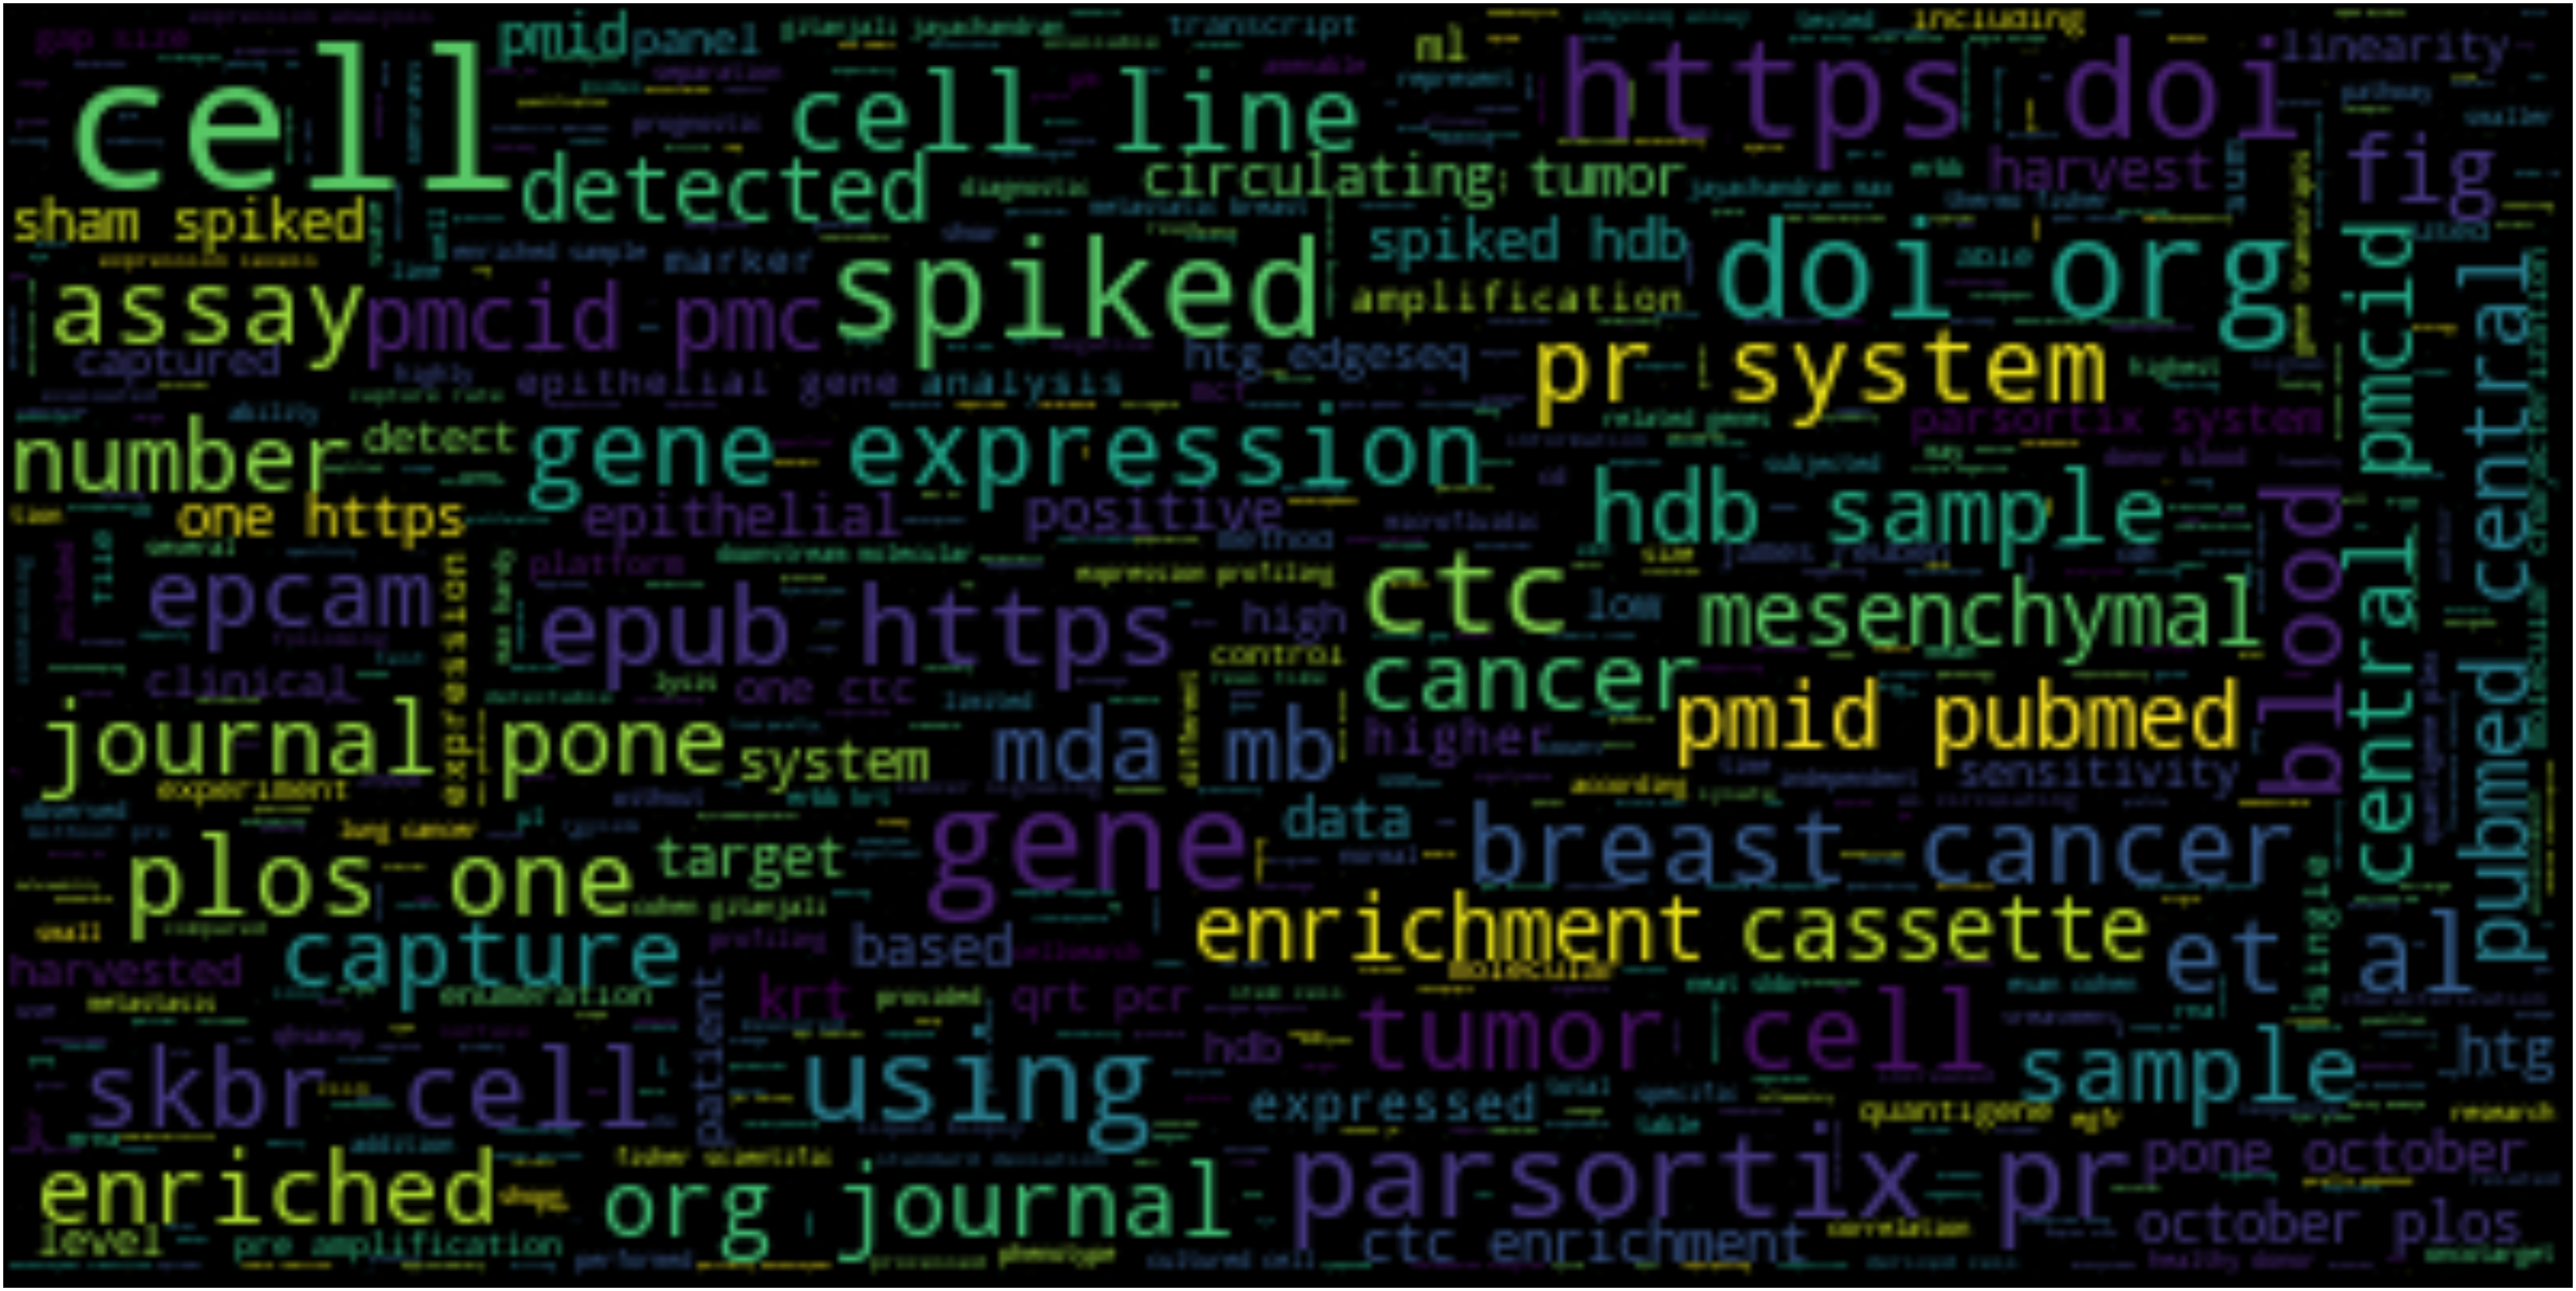

In [163]:
# modules for generating the word cloud 
from os import path, getcwd 
from PIL import Image 
import numpy as np 
import matplotlib.pyplot as plt 
from wordcloud import WordCloud
%matplotlib inline 
d = getcwd()  

# text = open('nlp.txt','r').read()
im_link = '/Users/Hailey/Documents/GitHub/projects/NLP/dog.jpg'  
mask = np.array(Image.open(im_link))
 
wc = WordCloud(background_color="black",max_words=3000, 
               max_font_size=30,min_font_size=0.00000001,
               random_state=42)   #mask=mask,
                
wc.generate(text) 
plt.figure(figsize=[100,80]) 
plt.imshow(wc, interpolation="bilinear") 
plt.axis("off");
#plt.savefig('wordcloud.jpg',bbox_inches='tight',pad_inches=0.3);

## Summary

### Watermark

In [3]:
# use watermark in a notebook with the following call
%load_ext watermark

# %watermark? #<-- watermark documentation

%watermark -a "H.GRYK" -d -t -v -p pandas
%watermark -p numpy
%watermark -p sys

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
H.GRYK 2020-11-02 13:32:49 

CPython 3.7.7
IPython 7.18.1

pandas 1.0.5
numpy 1.19.1
sys 3.7.7 (default, May  6 2020, 11:45:54) [MSC v.1916 64 bit (AMD64)]
